In [1]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json

In [3]:
load_dotenv()

True

In [13]:

my_gme = 0
headers = json.loads(open("keys.txt", 'r').read())
def hist_data(symbols, timeframe="15Min", limit=200, start="", end="", after="", until=""):
    df_data = {}
    bar_url = "https://data.alpaca.markets/v1" + f"/bars/{timeframe}"
    params = {"symbols":symbols,
             "limit":limit,
             "start":start,
             "end":end,
             "after":after,
             "until":until}
    r = requests.get(bar_url, headers=headers, params=params)
    json_dump = r.json()
    for symbol in json_dump:
        temp_df = pd.DataFrame(json_dump[symbol])
        temp_df.rename({"t":"time", "o":"open", "h":"high","l":"low","c":"close","v":"volume"}, axis=1, inplace=True)
        temp_df['time'] = pd.to_datetime(temp_df['time'], unit="s")
        temp_df.set_index("time",inplace=True)
        temp_df.index = temp_df.index.tz_localize("UTC").tz_convert("America/Indiana/Petersburg")
        df_data[symbol] = temp_df
    return df_data

df = hist_data('GME,AAPL')['GME']
df


,open,high,low,close,volume
time,,,,,
2021-07-30 11:45:00-04:00,161.67,162.13,161.60,161.60,2161
2021-07-30 12:00:00-04:00,161.33,161.43,160.85,160.85,901
2021-07-30 12:15:00-04:00,160.75,160.75,160.21,160.45,840
2021-07-30 12:30:00-04:00,160.92,160.92,160.29,160.54,1771
2021-07-30 12:45:00-04:00,160.59,160.59,160.09,160.36,660
...,...,...,...,...,...
2021-08-10 14:45:00-04:00,156.79,156.98,156.03,156.92,1611
2021-08-10 15:00:00-04:00,156.64,156.84,156.64,156.84,599
2021-08-10 15:15:00-04:00,158.00,158.00,157.65,157.67,609


In [14]:
title = 'Close Price History    '
my_stocks = df

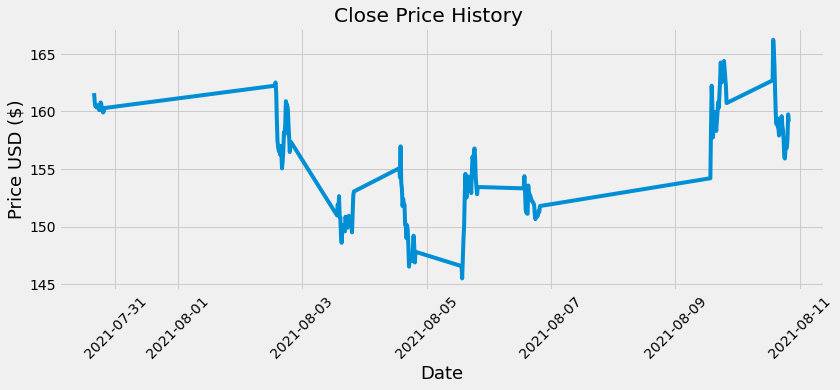

In [15]:
#Create and plot the graph

plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['close'],  label='close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()


In [17]:
#Calculate teh MACD and signal line indicators
#Calculate Short Term moving average
ShortEMA = df.close.ewm(span=12, adjust=False).mean() #AKA Fast moving average

#Calculate the Long Term Exponential Moving Average
LongEMA = df.close.ewm(span=26, adjust=False).mean() #AKA Slow moving average

##Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA

#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


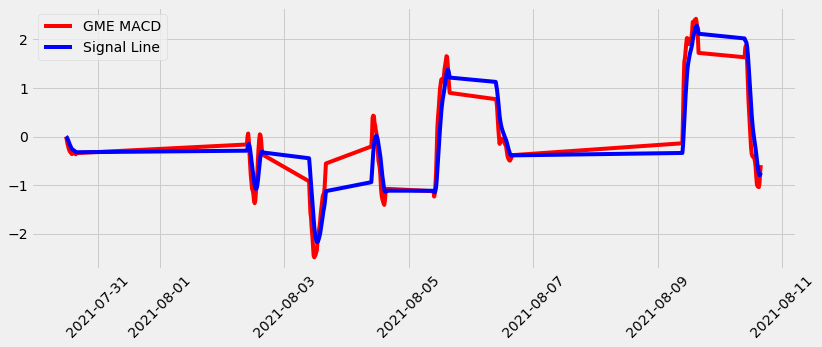

In [66]:
#Plotting the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='GME MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


In [19]:
#Create new columns for the data frame 
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data frame
df

,open,high,low,close,volume,MACD,Signal Line
time,,,,,,,
2021-07-30 11:45:00-04:00,161.67,162.13,161.60,161.60,2161,0.000000,0.000000
2021-07-30 12:00:00-04:00,161.33,161.43,160.85,160.85,901,-0.059829,-0.011966
2021-07-30 12:15:00-04:00,160.75,160.75,160.21,160.45,840,-0.137931,-0.037159
2021-07-30 12:30:00-04:00,160.92,160.92,160.29,160.54,1771,-0.190370,-0.067801
2021-07-30 12:45:00-04:00,160.59,160.59,160.09,160.36,660,-0.243645,-0.102970
...,...,...,...,...,...,...,...
2021-08-10 14:45:00-04:00,156.79,156.98,156.03,156.92,1611,-1.037266,-0.684784
2021-08-10 15:00:00-04:00,156.64,156.84,156.64,156.84,599,-1.041187,-0.756064
2021-08-10 15:15:00-04:00,158.00,158.00,157.65,157.67,609,-0.966182,-0.798088


In [72]:
#Create a function to signal when to buy and sell an asset

def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    for i in range(0,len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
            Buy.append(signal['Close'][i])
            flag = 1
        else:
            Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
        if flag != 0:
            Sell.append(signal['Close'][i])
            flag = 0
        else:
            Sell.append(np.nan)

    return (Buy, Sell)


SyntaxError: invalid syntax (<ipython-input-72-ee02f9aee5a9>, line 15)

In [61]:
#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the dataframe
df

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
